In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Hodgkin-Huxley model
V_rest = 0  # mV, Resting potential
g_Na = 120  # mS/cm^2, Sodium conductance
g_K = 36    # mS/cm^2, Potassium conductance
g_L = 0.3   # mS/cm^2, Leak conductance
V_Na = 115  # mV, Sodium reversal potential
V_K = -12   # mV, Potassium reversal potential
V_L = 10.6  # mV, Leak reversal potential
C_m = 1     # µF/cm^2, Membrane capacitance

# Time settings
dt = 0.01  # ms per timestep
time = np.arange(0, 100, dt)  # 100 ms total duration

# Redefining the create_stimulus function to ensure it is available 生成刺激电流 输入五个值
def create_stimulus(amplitudes, pulse_duration=5, gap_duration=10, total_duration=100, dt=0.01):
    stimulus = np.zeros(int(total_duration / dt)) # y值  num（生成多少个点）
    start_time = 0
    for amp in amplitudes:
        end_time = start_time + int(pulse_duration / dt)
        stimulus[start_time:end_time] = amp 
        start_time = end_time + int(gap_duration / dt) 
    return stimulus
I_stim_6 = create_stimulus([2, 3, 4, 6, 8])
I_stim_28 = create_stimulus([2, 4, 8, 16, 32])

def temperature_correction(T):
    return 3 ** ((T - 6.3) / 10)

def alpha_m(V): 
    return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1) 

def beta_m(V): 
    return 4.0 * np.exp(-V / 18)

def alpha_n(V): 
    return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1) 

def beta_n(V): 
    return 0.125 * np.exp(-V / 80) 

def alpha_h(V): 
    return 0.07 * np.exp(-V / 20) 

def beta_h(V): 
    return 1 / (np.exp((30 - V) / 10) + 1) 

# Gating variables initialization 初始化
# 假设你已经有一个数组 existing_array = np.array([[1, 2, 3], [4, 5, 6]])
# 使用 np.zeros_like 来创建一个形状和类型都和 existing_array 相同的新数组
m = np.zeros_like(time)
n = np.zeros_like(time)
h = np.zeros_like(time)
V = np.zeros_like(time)
m[0] = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
n[0] = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
h[0] = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))
V[0] = V_rest

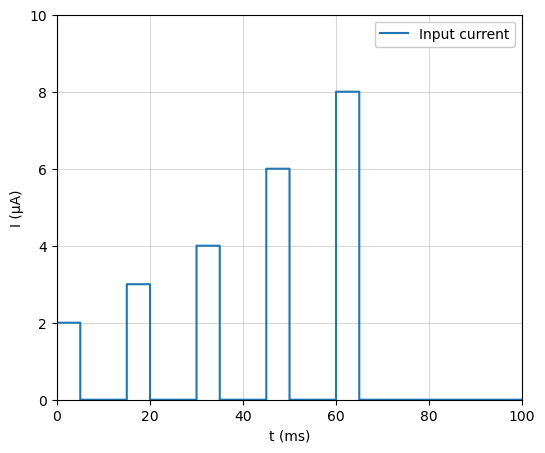

In [2]:
# 输出下电流先看看
plt.figure(figsize=(6, 5))
plt.plot(time, I_stim_6, label='Input current', drawstyle='steps-post')
plt.xlabel('t (ms)')
plt.ylabel('I (µA)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(0, 11, 2))
plt.xlim(0, 100)
plt.ylim(0,10)
plt.rcParams.update({'font.size': 16}) 
plt.show()

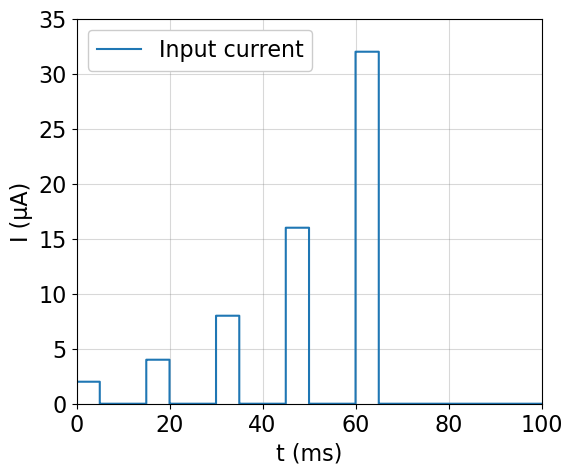

In [3]:
plt.figure(figsize=(6, 5))
plt.plot(time, I_stim_28, label='Input current', drawstyle='steps-post')
plt.xlabel('t (ms)')
plt.ylabel('I (µA)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(0, 36, 5))
plt.xlim(0, 100)
plt.ylim(0, 35)
plt.rcParams.update({'font.size': 16}) 
plt.show()

In [4]:
# 任务1: 计算时间常数和稳态值 Calculate the time constants (tau_x) and steady-state values (x_inf) for the gating variables
# 
def gating_parameters(V, T):
    alpha_m_val = alpha_m(V) * temperature_correction(T)  # 门控变量都乘上 时间校正系数？
    beta_m_val = beta_m(V) * temperature_correction(T)
    alpha_n_val = alpha_n(V) * temperature_correction(T)
    beta_n_val = beta_n(V) * temperature_correction(T)
    alpha_h_val = alpha_h(V) * temperature_correction(T)
    beta_h_val = beta_h(V) * temperature_correction(T)
# 时间常数    
    tau_m = 1 / (alpha_m_val + beta_m_val)
    tau_n = 1 / (alpha_n_val + beta_n_val)
    tau_h = 1 / (alpha_h_val + beta_h_val)
# 稳态值   
    m_inf = alpha_m_val / (alpha_m_val + beta_m_val)
    n_inf = alpha_n_val / (alpha_n_val + beta_n_val)
    h_inf = alpha_h_val / (alpha_h_val + beta_h_val)
    
    return tau_m, m_inf, tau_n, n_inf, tau_h, h_inf

# Voltage range for plotting  X自变量
Vol = np.linspace(-100, 100, 200)

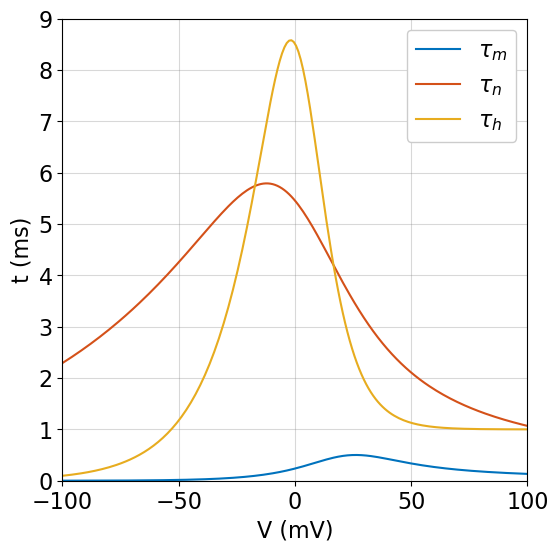

In [5]:
# Calculate the gating parameters for 6.3°C  y因变量
tau_m_6, m_inf_6, tau_n_6, n_inf_6, tau_h_6, h_inf_6 = gating_parameters(Vol, 6.3) 

# Plot the time constants and steady-state values
plt.figure(figsize=(6, 6))

# plt.subplot(1, 2, 1)
plt.plot(Vol, tau_m_6, label=r'$\tau_{m}$', color='#0072BD')
plt.plot(Vol, tau_n_6, label=r'$\tau_{n}$', color='#D45119')
plt.plot(Vol, tau_h_6, label=r'$\tau_{h}$', color='#E7AC1F')
plt.xlabel('V (mV)')
plt.ylabel('t (ms)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(-100, 101, 50)) # plt 刻度设为一
plt.yticks(np.arange(0, 10, 1))
plt.xlim(-100, 100)
plt.ylim(0,9)
plt.rcParams.update({'font.size': 16}) 

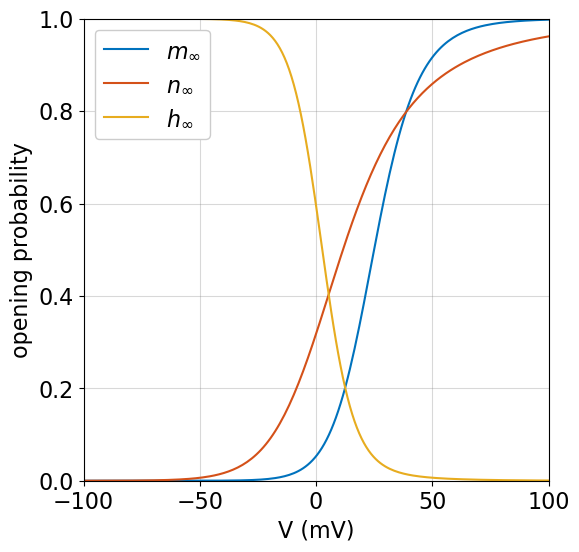

In [6]:
# plt.subplot(1, 2, 2)
plt.figure(figsize=(6, 6))
plt.plot(Vol, m_inf_6, label=r'$m_{\infty}$', color='#0072BD')
plt.plot(Vol, n_inf_6, label=r'$n_{\infty}$', color='#D45119')
plt.plot(Vol, h_inf_6, label=r'$h_{\infty}$', color='#E7AC1F')

plt.xlabel('V (mV)')
plt.ylabel('opening probability')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(-100, 101, 50)) # plt 刻度设为一
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlim(-100, 100)
plt.ylim(0,1)
plt.rcParams.update({'font.size': 16}) 
plt.show()

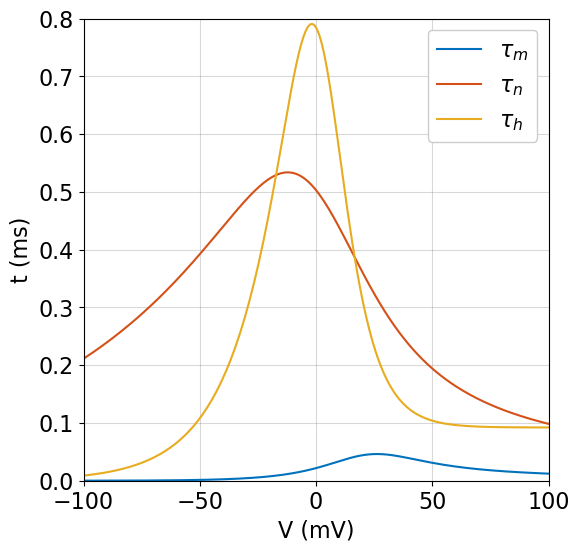

In [7]:
# Calculate the gating parameters for 6.3°C  y因变量
tau_m_28, m_inf_28, tau_n_28, n_inf_28, tau_h_28, h_inf_28 = gating_parameters(Vol, 28) 

# Plot the time constants and steady-state values
plt.figure(figsize=(6, 6))

# plt.subplot(1, 2, 1)
plt.plot(Vol, tau_m_28, label=r'$\tau_{m}$', color='#0072BD')
plt.plot(Vol, tau_n_28, label=r'$\tau_{n}$', color='#D45119')
plt.plot(Vol, tau_h_28, label=r'$\tau_{h}$', color='#E7AC1F')
plt.xlabel('V (mV)')
plt.ylabel('t (ms)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(-100, 101, 50)) # plt 刻度设为一
plt.yticks(np.arange(0, 0.9, 0.1))
plt.xlim(-100, 100)
plt.ylim(0, 0.8)
plt.rcParams.update({'font.size': 16}) 

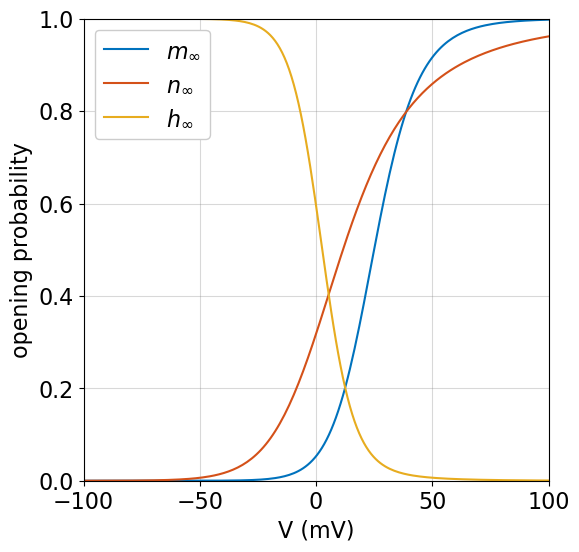

In [8]:
# plt.subplot(1, 2, 2)
plt.figure(figsize=(6, 6))
plt.plot(Vol, m_inf_28, label=r'$m_{\infty}$', color='#0072BD')
plt.plot(Vol, n_inf_28, label=r'$n_{\infty}$', color='#D45119')
plt.plot(Vol, h_inf_28, label=r'$h_{\infty}$', color='#E7AC1F')

plt.xlabel('V (mV)')
plt.ylabel('opening probability')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(-100, 101, 50)) # plt 刻度设为一
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlim(-100, 100)
plt.ylim(0, 1)
plt.rcParams.update({'font.size': 16}) 
plt.show()

In [9]:
def hh_model(I_stim, T, t_end=100, dt=0.01):
# Hodgkin-Huxley model simulation 一个循环得出所有值 解决图4，5，6，图7只是其中28度mnh的局部放大
    I_Na = np.zeros_like(time)
    I_K = np.zeros_like(time)
    I_leak = np.zeros_like(time)
    for i in range(1, len(time)):
        # Update gating variables m,n,h
        m[i] = m[i-1] + dt * (alpha_m(V[i-1]) * (1 - m[i-1]) - beta_m(V[i-1]) * m[i-1]) * temperature_correction(T)
        n[i] = n[i-1] + dt * (alpha_n(V[i-1]) * (1 - n[i-1]) - beta_n(V[i-1]) * n[i-1]) * temperature_correction(T)
        h[i] = h[i-1] + dt * (alpha_h(V[i-1]) * (1 - h[i-1]) - beta_h(V[i-1]) * h[i-1]) * temperature_correction(T)

        # Calculate currents based on gating variables
        I_Na[i] = g_Na * m[i]**3 * h[i] * (V[i-1] - V_Na)
        I_K[i] = g_K * n[i]**4 * (V[i-1] - V_K)
        I_leak[i] = g_L * (V[i-1] - V_L)

        # Update membrane potential
        V[i] = V[i-1] + (I_stim[i] - I_Na[i] - I_K[i] - I_leak[i]) / C_m * dt
        
    return m,n,h,I_Na,I_K,V

In [10]:
# 第一种情况/温度：
m_6,n_6,h_6,I_Na_6,I_K_6,V_6 = hh_model(I_stim_6, 6.3)

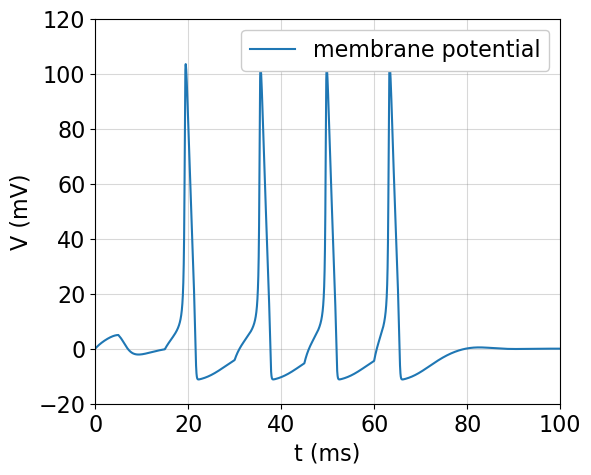

In [11]:
# Plot the results
plt.figure(figsize=(6, 5))
plt.plot(time, V_6, label='membrane potential')
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(loc='upper right', facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(-20, 121, 20))
plt.xlim(0, 100)
plt.ylim(-20, 120)
plt.rcParams.update({'font.size': 16}) 
plt.show()

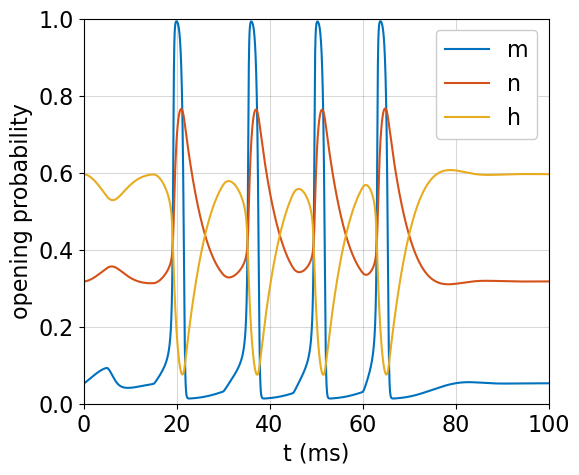

In [12]:
# Plot the results
plt.figure(figsize=(6, 5))
plt.plot(time, m_6, label='m', color='#0072BD')
plt.plot(time, n_6, label='n', color='#D45119')
plt.plot(time, h_6, label='h', color='#E7AC1F')
plt.xlabel('t (ms)')
plt.ylabel('opening probability')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlim(0, 100)
plt.ylim(0,1)
plt.rcParams.update({'font.size': 16}) 

# plt.tight_layout()
plt.show()

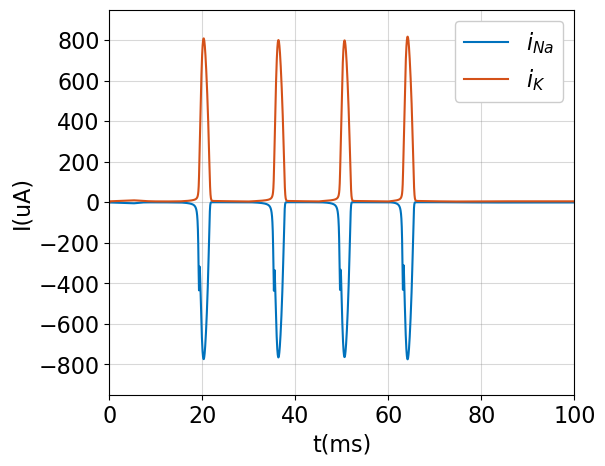

In [13]:
plt.figure(figsize=(6, 5))
plt.plot(time, I_Na_6, label='$i_{Na}$', color='#0072BD')
plt.plot(time, I_K_6, label='$i_{K}$', color='#D45119')
plt.xlabel('t(ms)')
plt.ylabel('I(uA)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(-1000, 1000, 200))
plt.xlim(0, 100)
plt.ylim(-950,950)
plt.rcParams.update({'font.size': 16}) 
plt.show()

In [14]:
# 第二种情况/温度：
m_28,n_28,h_28,I_Na_28,I_K_28,V_28 = hh_model(I_stim_28, 28)

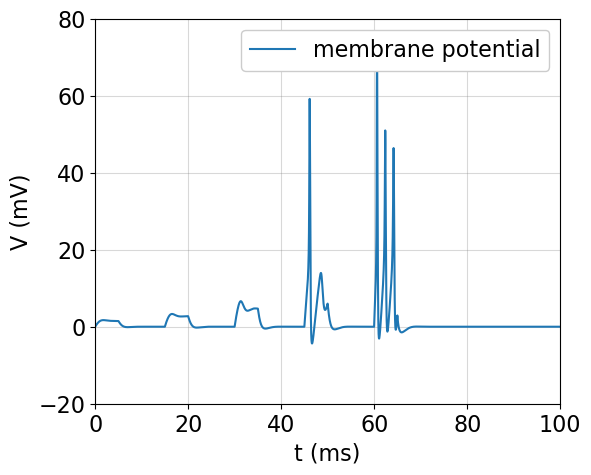

In [15]:
# Plot the results
plt.figure(figsize=(6, 5))
plt.plot(time, V_28, label='membrane potential')
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(loc='upper right', facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(-20, 81, 20))
plt.xlim(0, 100)
plt.ylim(-20, 80)
plt.rcParams.update({'font.size': 16}) 
plt.show()

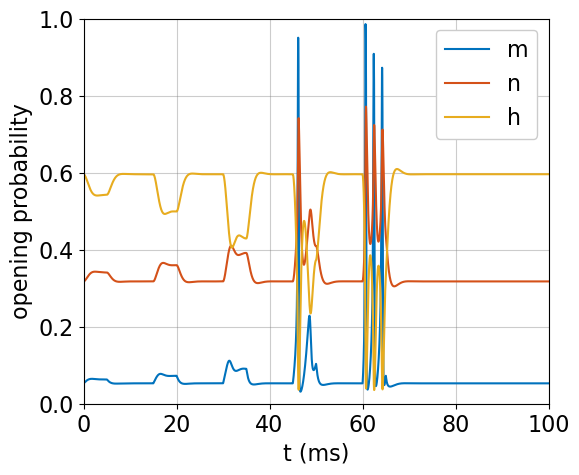

In [16]:
# Plotting the results for 28°C
plt.figure(figsize=(6, 5))
plt.plot(time, m_28, label='m', color='#0072BD')
plt.plot(time, n_28, label='n', color='#D45119')
plt.plot(time, h_28, label='h', color='#E7AC1F')
plt.xlabel('t (ms)')
plt.ylabel('opening probability')
plt.grid(True, linestyle='-', color='grey', alpha=0.4)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlim(0, 100)
plt.ylim(0,1)
plt.rcParams.update({'font.size': 16}) 
plt.show()

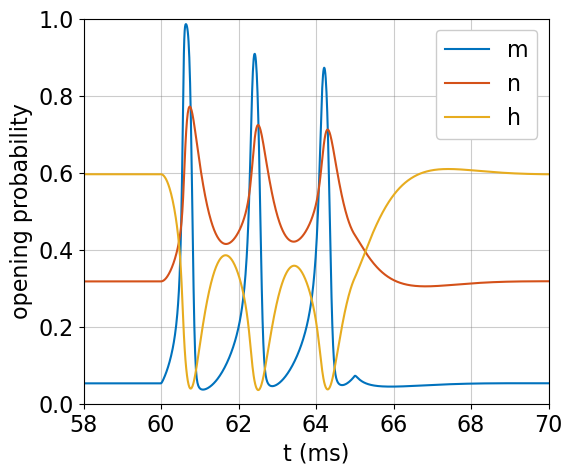

In [17]:
# 特写，最后一个图
plt.figure(figsize=(6, 5))
plt.plot(time, m_28, label='m', color='#0072BD')
plt.plot(time, n_28, label='n', color='#D45119')
plt.plot(time, h_28, label='h', color='#E7AC1F')
plt.xlabel('t (ms)')
plt.ylabel('opening probability')
plt.grid(True, linestyle='-', color='grey', alpha=0.4)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(58, 71, 2)) # plt 刻度设为一
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlim(58, 70)
plt.ylim(0,1)
plt.rcParams.update({'font.size': 16}) 

# plt.tight_layout()
plt.show()

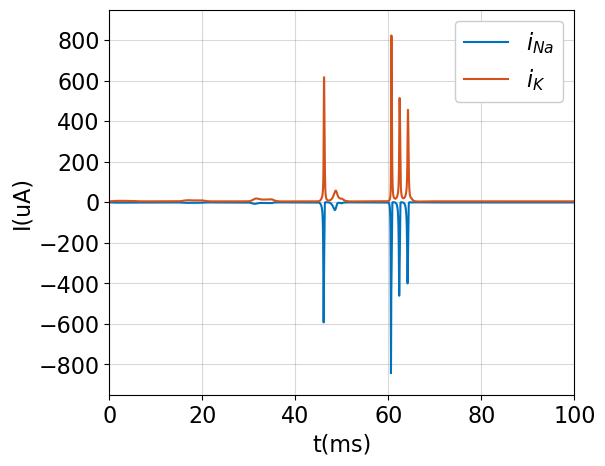

In [18]:
plt.figure(figsize=(6, 5))
plt.plot(time, I_Na_28, label='$i_{Na}$', color='#0072BD')
plt.plot(time, I_K_28, label='$i_{K}$', color='#D45119')
# plt.plot(time, h_28, label='h', color='#E7AC1F')
plt.xlabel('t(ms)')
plt.ylabel('I(uA)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.xticks(np.arange(0, 101, 20)) # plt 刻度设为一
plt.yticks(np.arange(-1000, 1000, 200))
plt.xlim(0, 100)
plt.ylim(-950,950)
plt.rcParams.update({'font.size': 16}) 
plt.show()